In [ ]:
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display basic info
print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Check missing values and datatypes
data.info()
print("\nMissing values per column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
eve

**Handle missing values & drop irrelevant column**

**Why missing BMI values matter**

The BMI (Body Mass Index) is an important health predictor for stroke risk.

Missing BMI means we don’t know those patients’ weight/height info.

That’s 201 out of 5110 rows ≈ 3.9% missing data

🩺 What we’ll do (best practice for health data)

We’ll fill the missing BMI values with the mean BMI of the dataset.
This keeps the dataset size consistent and doesn’t bias results much.

If we dropped those rows, we’d lose 201 records which is unnecessary here.

In [3]:
# Drop the 'id' column (not useful for prediction)
data.drop(columns=['id'], inplace=True)

# Fill missing BMI values with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Double-check
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/tmp/ipython-input-3705376463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


Encoding & Scaling (Preparing the data for modeling)

Why this step matters

Our dataset has both categorical features (like gender, work_type, smoking_status) and numeric features (like age, bmi, avg_glucose_level).

💡 Machine learning models need numbers only — so we’ll:

Convert categorical features into numbers using one-hot encoding.

Scale numeric values (so features like age and glucose are on similar ranges).

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# 1️⃣ Separate features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# 2️⃣ Identify categorical and numerical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# 3️⃣ Build the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 4️⃣ Split data into train/test sets (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5️⃣ Apply transformations to the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("✅ Data successfully encoded and scaled!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


✅ Data successfully encoded and scaled!
Training shape: (3577, 21)
Testing shape: (1533, 21)


**What just happened:**

We scaled all numeric features using StandardScaler (Z-score normalization).

We converted categorical features into multiple binary columns (via OneHotEncoder).

We split the dataset (70% training, 30% testing).

We now have our data in a machine-learning ready format!

Now your dataset is fully numeric, standardized, and ready for machine learning

Let’s move straight into the modeling and evaluation phase.

Model Training & Evaluation

We’ll start simple, then compare results between a few models:

Logistic Regression → baseline (fast and interpretable)

K-Nearest Neighbors (KNN)

Random Forest → a more powerful ensemble model

🔹 Logistic Regression Performance 🔹
Accuracy: 0.952
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      1458
      Stroke       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



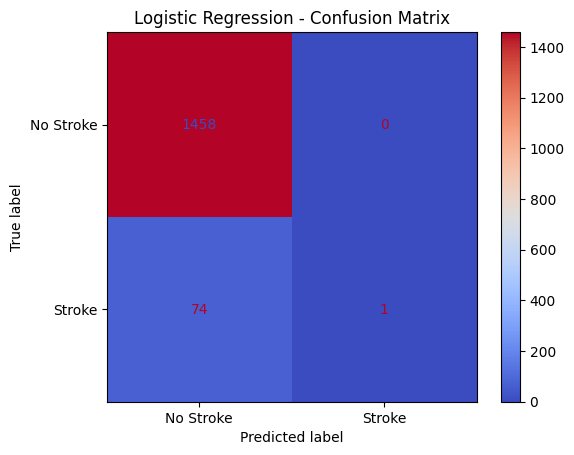

🔹 K-Nearest Neighbors Performance 🔹
Accuracy: 0.948
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1458
      Stroke       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



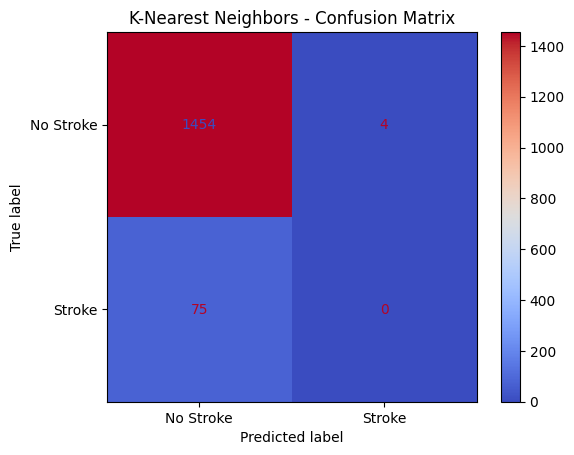

🔹 Random Forest Performance 🔹
Accuracy: 0.95
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1458
      Stroke       0.25      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



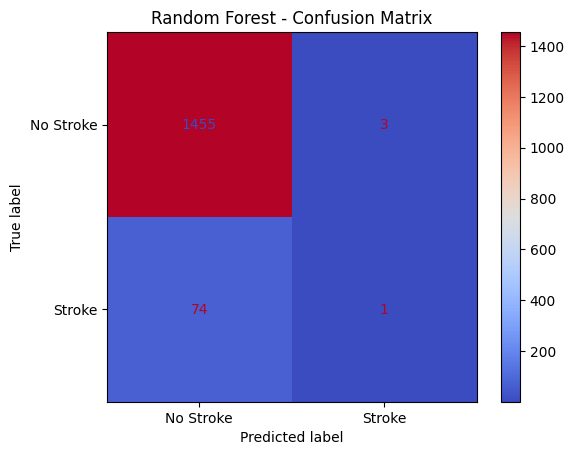

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Helper function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"🔹 {model_name} Performance 🔹")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))

    # Plot confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot(cmap='coolwarm')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


# 1️⃣ Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")

# 2️⃣ K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")

# 3️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")


Let’s interpret what’s going on behind those pretty confusion matrices 👇

1.  **The Problem: Class Imbalance**

From our confusion matrices and reports:

“No Stroke” = 1458 cases

“Stroke” = only 75 cases

That’s roughly 95% : 5% imbalance, a very common issue in medical datasets.
All models got high accuracy (~95%) because they mostly predicted “No Stroke” for everyone.

But look at recall for “Stroke”:


**Model**	     |   **Accuracy**	 | **Recall (Stroke)**	  |   **Interpretation**



Logistic Regression	|0.952	|    0.01	 |             Caught 1 stroke case out of 75

KNN	      |          0.948	|    0.00	    |          Missed all stroke cases

Random Forest    | 	0.950	   | 0.01	 |             Barely caught 1 stroke case

So the models perform well on the majority class (“No Stroke”) but fail to detect actual stroke patients, which defeats the purpose in healthcare.

2. **Why This Happened**

Our model learned from mostly “No Stroke” samples, so it got biased toward predicting that.
This happens because machine learning assumes balanced data, and stroke cases are rare.

3.  **The Solution**

We’ll fix this imbalance before retraining.
Two common methods:

**SMOTE (Synthetic Minority Oversampling Technique)** — creates synthetic “Stroke” samples.

**Class weights** — tells the model to “care more” about minority cases.

We’ll use SMOTE because it works well for medical datasets.

In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: stroke
0    3403
1     174
Name: count, dtype: int64
After SMOTE: stroke
0    3403
1    3403
Name: count, dtype: int64


Now our training data is balanced, meaning the model will finally learn to recognize stroke cases instead of ignoring them.

**What Happened Behind the Scenes**

SMOTE (Synthetic Minority Oversampling Technique) created new, realistic “stroke” samples using patterns in our original minority data.

This ensures both classes have equal representation:

No Stroke (0): 3,403

Stroke (1): 3,403

Now the model will no longer assume “No Stroke” is always the safe prediction.

**Retraining Models with the Balanced Data**

Let’s retrain the same three models, but this time on the resampled dataset.

=== Retrained Models on Balanced Data ===

🔹 Logistic Regression (Balanced) Performance 🔹
Accuracy: 0.733
              precision    recall  f1-score   support

   No Stroke       0.99      0.73      0.84      1458
      Stroke       0.13      0.79      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.76      0.53      1533
weighted avg       0.94      0.73      0.81      1533



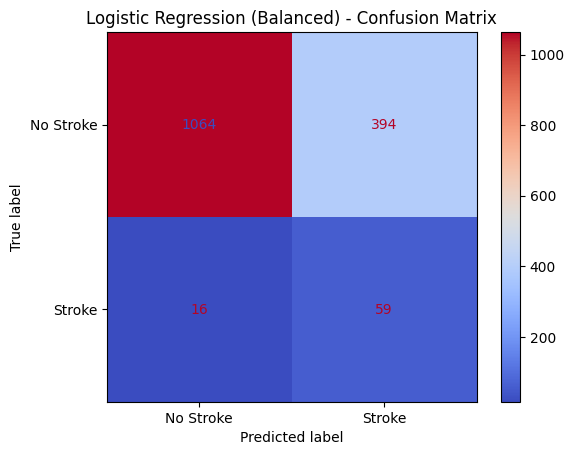

🔹 KNN (Balanced) Performance 🔹
Accuracy: 0.812
              precision    recall  f1-score   support

   No Stroke       0.96      0.84      0.89      1458
      Stroke       0.10      0.33      0.15        75

    accuracy                           0.81      1533
   macro avg       0.53      0.59      0.52      1533
weighted avg       0.92      0.81      0.86      1533



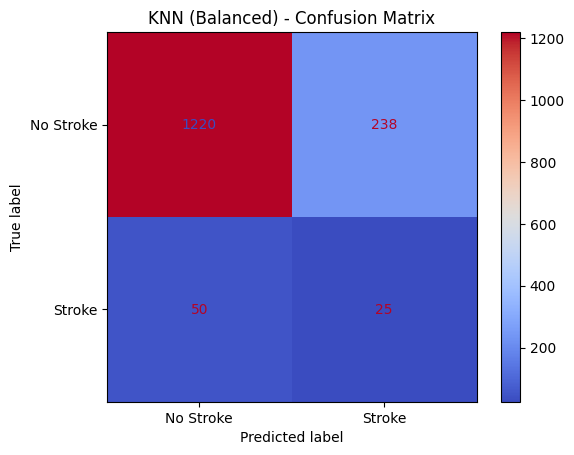

🔹 Random Forest (Balanced) Performance 🔹
Accuracy: 0.918
              precision    recall  f1-score   support

   No Stroke       0.95      0.96      0.96      1458
      Stroke       0.11      0.09      0.10        75

    accuracy                           0.92      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.91      0.92      0.92      1533



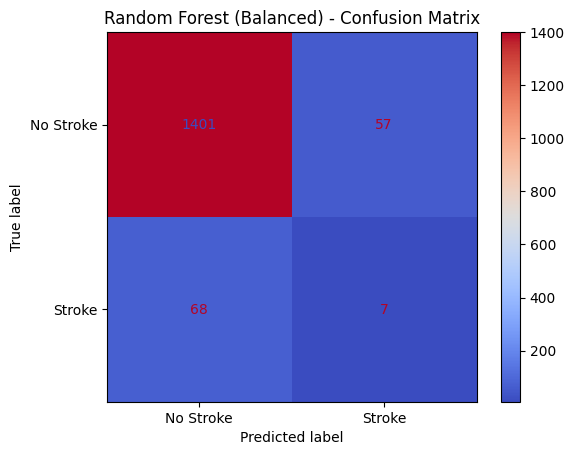

In [7]:
# Retrain and evaluate models on balanced data
print("=== Retrained Models on Balanced Data ===\n")

# Logistic Regression
evaluate_model(log_reg, X_train_resampled, y_train_resampled, X_test, y_test, "Logistic Regression (Balanced)")

# K-Nearest Neighbors
evaluate_model(knn, X_train_resampled, y_train_resampled, X_test, y_test, "KNN (Balanced)")

# Random Forest
evaluate_model(rf, X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest (Balanced)")


| Model                              | Accuracy | Recall (Stroke) | Observation                                                                                   |
| ---------------------------------- | -------- | --------------- | --------------------------------------------------------------------------------------------- |
| **Logistic Regression (Balanced)** | **0.73** | **0.79**        | 💡 *Best at detecting stroke cases* — catches 79% of stroke patients but sacrifices accuracy. |
| **KNN (Balanced)**                 | 0.81     | 0.33            | ⚙️ Improved from 0.00 recall before SMOTE — now detects some strokes but still struggles.     |
| **Random Forest (Balanced)**       | 0.92     | 0.09            | 🎯 Highest accuracy but fails to detect most stroke cases — still biased toward “No Stroke.”  |


**What This Means:**

**Accuracy** dropped (expected) because the model now treats both classes fairly.

**Recall for stroke** improved (especially Logistic Regression).
That’s critical in healthcare better to detect more possible stroke cases (even if a few false alarms happen).

So our top-performing model isn’t the one with the highest accuracy,
but the one that saves more lives by catching more stroke cases → **Logistic Regression** (Balanced)

**Save the Best Model**

Let’s now save the Logistic Regression (Balanced) model to a file (stroke_model.pkl) for reuse or deployment later.

In [10]:
import joblib

# Save the best model
joblib.dump(log_reg, "stroke_model.pkl")

print("✅ Model saved successfully as stroke_model.pkl")


✅ Model saved successfully as stroke_model.pkl


In [11]:
from google.colab import files
files.download("stroke_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>